In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

t-SNE

(t-distributed stochastic embedding)

Алгоритм был предложен в 2008 году Лоуренсом ван дер Маатеном и Джеффри Хинтоном

С помощью t-SNE можно снижать размерность даных, что позволяет визуализировать многомерные данные в 2Д и 3Д графике

Если объекты в выборке имеют большое количество признаков, то можно получить представление о них

преобразовав данные с помощью алгоритма t-SNE

В частности, можно увидеть возможность разделения объектов на кластеры, определить подходящее их число, а так же 

получить представление о качестве разбиения на кластеры

In [2]:
from sklearn.manifold import TSNE

Загрузим данные о недвижимости

In [3]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
data = boston.data

In [8]:
feature_names = boston.feature_names

In [9]:
X = pd.DataFrame(data, columns=feature_names)

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
price = boston.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Масштабирование признаков

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [20]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Применение t-SNE

In [24]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [57]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

C:\Bin\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 29.405048  ,  -7.5522704 ],
       [  5.8658705 , -10.883258  ],
       [ 26.05793   , -20.519955  ],
       [ 24.698063  , -21.08252   ],
       [ 25.352638  , -11.3375025 ],
       [  8.26603   ,   8.857971  ],
       [  5.950132  ,   9.273748  ],
       [-13.158973  ,   3.1918762 ],
       [-17.553284  ,  10.465562  ],
       [ 32.76806   , -15.548753  ],
       [-13.811531  ,   7.3871803 ],
       [ 27.922699  ,  -6.894809  ],
       [ -5.536215  ,  -0.5374289 ],
       [-15.75593   ,  12.562386  ],
       [ 26.931305  , -21.276148  ],
       [-19.451988  ,  14.168899  ],
       [ -8.133663  ,   6.271011  ],
       [ 27.624561  , -21.367247  ],
       [-17.967472  ,   9.214143  ],
       [ 28.754122  , -10.930978  ],
       [  4.43713   ,  -8.805929  ],
       [ -2.7869797 ,   6.994     ],
       [-14.9308195 ,  10.408099  ],
       [-18.880047  ,  15.237269  ],
       [ 25.036835  , -21.516737  ],
       [ -1.9183384 ,   5.4480968 ],
       [ 24.274048  , -12.040439  ],
 

In [27]:
X_train_tsne.shape

(354, 2)

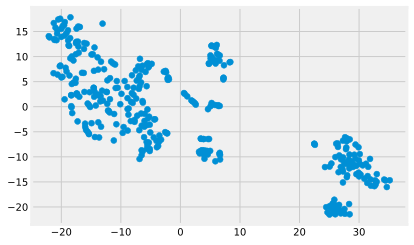

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Разобьём данные на 2 кластера

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2)

In [31]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [32]:
pd.value_counts(labels_train)

0    232
1    122
dtype: int64

In [33]:
labels_test = kmeans.predict(X_test_scaled)

График t-SNE с известными лейблами

Text(25, -7, 'Кластер 1')

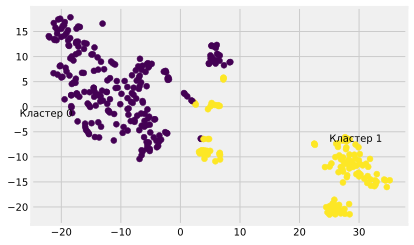

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -2, 'Кластер 0')
plt.text(25, -7, 'Кластер 1')

Посмотрим на данные, расположенные в разных кластерах

In [35]:
y_train.mean()

22.595762711864406

In [36]:
y_train[labels_train==0].mean()

25.94439655172414

In [37]:
y_train[labels_train==1].mean()

16.227868852459018

Text(0.5, 0, 'Цена')

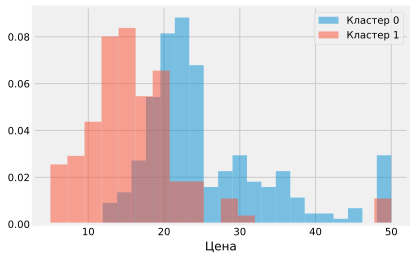

In [38]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

In [39]:
X_train.loc[labels_train==0, 'RM'].mean()

6.44851724137931

In [40]:
X_train.loc[labels_train==1, 'RM'].mean()

5.9092868852459

In [41]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.2679815948275862

In [42]:
X_train.loc[labels_train==1, 'CRIM'].mean()

9.056794180327868

Text(0.5, 0, 'CRIM per capita crime rate by town')

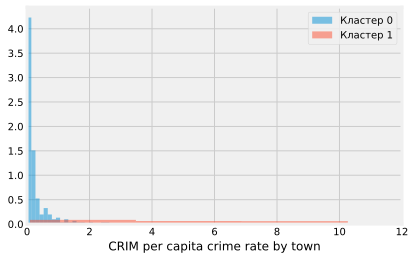

In [43]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM per capita crime rate by town')

Text(0.5, 0, 'NOX\nnitric oxides concentration (parts per 10 million)')

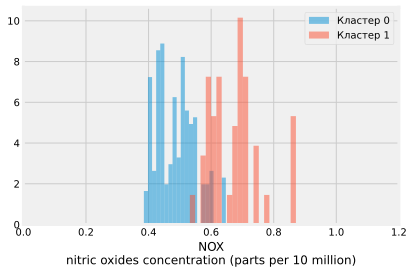

In [44]:
plt.hist(X_train.loc[labels_train==0, 'NOX'], bins = 20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'NOX'], bins = 20, density=True, alpha=0.5)
plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX\nnitric oxides concentration (parts per 10 million)')

Использование информации, полученной с помощью t-SNE в моделях

Базовая модель предсказания цены на недвижимость ( до разделения на кластеры)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
y_test_pred = lr.predict(X_test_scaled)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, y_test_pred)

0.6508417720329545

Две модели, построенные на объектах из разных кластеров

In [51]:
# 1я модель - на объектах из Кластера 0
lr.fit(X_train_scaled.loc[labels_train==0, :],
      y_train[labels_train==0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])

r2_score(y_test[labels_test==0], y_test_pred_0)

0.8316034335298439

In [52]:
# 2-я модель на объектах кластера 1
lr.fit(X_train_scaled.loc[labels_train==1, :],
      y_train[labels_train==1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])

r2_score(y_test[labels_test==1], y_test_pred_1)

0.6458127429551191

In [53]:
# Объединение известных правильных ответов
y_test_all = np.hstack([y_test[labels_test==0],
                       y_test[labels_test==1]])

In [54]:
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [55]:
r2_score(y_test_all, y_test_pred_all)

0.8055877528812475